In [ ]:
%load_ext autoreload
%autoreload 2

import terra
import numpy as np
import meerkat as mk
import pandas as pd
import torch

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, FastICA
from domino.sdm import GeorgeSDM
import meerkat.contrib.mimic
from domino.evaluate.linear import induce_correlation
from domino.evaluate.train import train_linear_slices, train_model, score_model, score_linear_slices
from domino.evaluate.evaluate import run_sdm


In [1]:
import matplotlib.pyplot as plt
import numpy as np

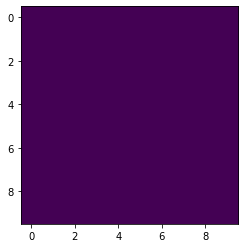

In [3]:
plt.imshow(np.zeros((10,10)))

In [2]:
df = score_linear_slices.out(3190).load().iloc[10:]

In [3]:
run_id = 3192
inp = score_model.inp(run_id)
target, correlate = inp["target"], inp["correlate"]
dp = score_model.out(run_id)[0].load()

In [4]:
sdm = GeorgeSDM(config={"cluster_method": "gmm", "n_slices": 6})
sdm.fit(dp, aliases={"target": target, "model.layer4": "layer4.0_mean"})

,target,correlate,corr,num_examples,run_id,time_this_iter_s,done,timesteps_total,episodes_total,training_iteration,...,time_total_s,pid,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,trial_id,config/args,logdir
10,Pleural_Effusion_uzeros,gender_male,0.2,30000.0,1492,39.819059,False,NaN,NaN,1,...,39.819059,13753,pod-sabri,10.92.1.3,39.819059,0,1,9b209_00010,"{'corr': 0.2, 'correlate': 'gender_male', 'num...",/root/ray_results/_score_model_2021-07-07_16-4...
11,Pleural_Effusion_uzeros,gender_male,0.3,30000.0,1493,39.747640,False,NaN,NaN,1,...,39.747640,13951,pod-sabri,10.92.1.3,39.747640,0,1,9b209_00011,"{'corr': 0.3, 'correlate': 'gender_male', 'num...",/root/ray_results/_score_model_2021-07-07_16-4...
12,Pleural_Effusion_uzeros,gender_male,0.4,30000.0,1494,39.943068,False,NaN,NaN,1,...,39.943068,14146,pod-sabri,10.92.1.3,39.943068,0,1,9b209_00012,"{'corr': 0.4, 'correlate': 'gender_male', 'num...",/root/ray_results/_score_model_2021-07-07_16-4...
13,Pleural_Effusion_uzeros,gender_male,0.5,30000.0,1495,40.437483,False,NaN,NaN,1,...,40.437483,14347,pod-sabri,10.92.1.3,40.437483,0,1,9b209_00013,"{'corr': 0.5, 'correlate': 'gender_male', 'num...",/root/ray_results/_score_model_2021-07-07_16-4...
14,Pleural_Effusion_uzeros,gender_male,0.6,30000.0,1496,39.840637,False,NaN,NaN,1,...,39.840637,14543,pod-sabri,10.92.1.3,39.840637,0,1,9b209_00014,"{'corr': 0.6000000000000001, 'correlate': 'gen...",/root/ray_results/_score_model_2021-07-07_16-4...
15,Pleural_Effusion_uzeros,gender_male,0.7,30000.0,1497,40.422139,False,NaN,NaN,1,...,40.422139,14741,pod-sabri,10.92.1.3,40.422139,0,1,9b209_00015,"{'corr': 0.7000000000000001, 'correlate': 'gen...",/root/ray_results/_score_model_2021-07-07_16-4...
16,Pleural_Effusion_uzeros,gender_male,0.8,30000.0,1498,39.930714,False,NaN,NaN,1,...,39.930714,14939,pod-sabri,10.92.1.3,39.930714,0,1,9b209_00016,"{'corr': 0.8, 'correlate': 'gender_male', 'num...",/root/ray_results/_score_model_2021-07-07_16-4...
17,Edema_uzeros,gender_male,0.0,30000.0,1499,39.753915,False,NaN,NaN,1,...,39.753915,15135,pod-sabri,10.92.1.3,39.753915,0,1,9b209_00017,"{'corr': 0.0, 'correlate': 'gender_male', 'num...",/root/ray_results/_score_model_2021-07-07_16-4...
18,Edema_uzeros,gender_male,0.1,30000.0,1500,40.207289,False,NaN,NaN,1,...,40.207289,15330,pod-sabri,10.92.1.3,40.207289,0,1,9b209_00018,"{'corr': 0.1, 'correlate': 'gender_male', 'num...",/root/ray_results/_score_model_2021-07-07_16-4...
19,Edema_uzeros,gender_male,0.2,30000.0,1501,40.018706,False,NaN,NaN,1,...,40.018706,15528,pod-sabri,10.92.1.3,40.018706,0,1,9b209_00019,"{'corr': 0.2, 'correlate': 'gender_male', 'num...",/root/ray_results/_score_model_2021-07-07_16-4...


In [13]:
inp = terra.inp(1493)
model = inp["model"].load()
dp = inp["dp"].load()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


/home/common/envs/conda/envs/domino/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [ ]:
dp

5

In [26]:
# load training 
run_id = 3205
inp_dp = score_model.inp(run_id)["dp"].load()
out = score_model.out(run_id=run_id, load=True)
acts_dp = out[0]
target, correlate, corr = out[1]["target"], out[1]["correlate"], out[1]["corr"]

# need to get splits
inp_dp = score_model.inp(run_id)["dp"].load()
acts_dp= acts_dp.merge(inp_dp[["dicom_id", "split"]], how="left", on="dicom_id")

In [27]:
roc_auc_score(acts_dp[correlate], acts_dp["output"].data[:, -1])

0.7621259289119832

In [32]:
def fit_probe(dp, model, layer: str = "layer3_mean"):
    print("Fitting...")
    valid_dp = dp.lz[dp["split"].data == "validate"]
    acts = valid_dp[layer]
    model.fit(acts, valid_dp[correlate])

    print("Predicting...")
    test_dp = dp.lz[dp["split"].data == "test"]
    acts = test_dp[layer]
    test_dp["pred"] = model.predict_proba(acts)
    return test_dp, model


Fitting...
Predicting...
0.9156957952498602


<BarContainer object of 1024 artists>

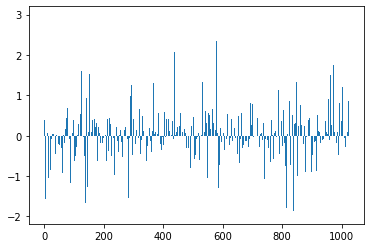

In [33]:
out_dp, model = fit_probe(acts_dp, LogisticRegression())
print(roc_auc_score(out_dp[correlate], out_dp["pred"].data[:, 1]))
plt.bar(x=np.arange(len(model.coef_[0])), height=model.coef_[0])

In [215]:
def fit_pca_probe(dp, model_cls, **kwargs):
    print("Fitting...")
    valid_dp = dp.lz[dp["split"].data == "validate"]
    model = model_cls(**kwargs)
    acts = valid_dp["activation_layer4"].mean(dim=[-1, -2])
    pca = PCA().fit(acts)
    components = pca.transform(acts)
    model.fit(components, valid_dp[correlate])

    print("Predicting...")
    test_dp = dp.lz[dp["split"].data == "test"]
    acts = test_dp["activation_layer4"].mean(dim=[-1, -2])
    components = pca.transform(acts)
    test_dp["components"] = components
    test_dp["pred"] = model.predict_proba(components)
    return test_dp, model, pca 

In [21]:
out_dp, model, pca = fit_pca_probe(act_dp, LogisticRegression)
print(roc_auc_score(out_dp[correlate], out_dp["pred"].data[:, 1]))
plt.bar(x=np.arange(len(model.coef_[0])), height=model.coef_[0])

NameError: name 'fit_pca_probe' is not defined

In [139]:
np.argsort(-np.abs(model.coef_))[0, :10]

array([ 31,  12,  16, 127,  30,  25,  46,  49, 108,  90])

In [151]:
roc_auc_score(out_dp[correlate], out_dp["components"].data[:, 108])

0.47420121462656406

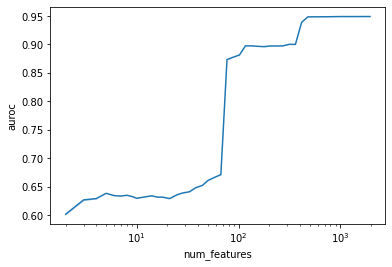

In [183]:
def plot_features_v_auroc(model, dp):
    results = []
    for num_features in np.logspace(1, np.log2(len(model.coef_[0])), num=50, base=2):
        num_features = int(num_features)
        mask = np.argsort(-np.abs(model.coef_))[0, :num_features]
        preds = np.matmul(dp["components"].data[:, mask], model.coef_.T[mask, :])
        score = roc_auc_score(dp[correlate], preds)
        results.append({"auroc": score, "num_features": num_features})
    plot_df = pd.DataFrame(results)
    sns.lineplot(data=plot_df, x="num_features", y="auroc")
    plt.xscale("log")
    return plot_df
plot_features_v_auroc(model, out_dp);

In [185]:
scores = []
for comp_idx in range(out_dp["components"].data.shape[-1]):
    scores.append(
        roc_auc_score(out_dp[correlate], out_dp["components"].data[:, comp_idx])
    )
np.sort(scores)

array([0.24111467, 0.28825554, 0.408827  , ..., 0.59450454, 0.6221593 ,
       0.68337911])